In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression,Perceptron    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier    
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
%matplotlib inline

In [114]:
data=pd.read_csv('data.csv')

In [115]:
data.head()

,CA1,CA2,D
0,28.0,13.3,0
1,15.5,11.1,0
2,8.2,16.7,0
3,3.4,12.6,0
4,17.3,7.4,0


In [116]:
data.shape

(141, 3)

In [117]:
X=data[["CA1","CA2"]]
X.shape

(141, 2)

In [118]:
Y=data[["D"]]
Y.shape

(141, 1)

# SVM

In [119]:
#SVM

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

svm= SVC()
svm.fit(X_train, y_train)
pred1=svm.predict(X_test)
print('accuracy on testing dataset: {:.3f}'.format(accuracy_score(pred1,y_test)))

accuracy on testing dataset: 0.605


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [120]:
#data scaling
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

print('Min per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Max per feature\n{}'.format(X_train_scaled.max(axis=0)))

Min per feature
CA1    0.0
CA2    0.0
dtype: float64
Max per feature
CA1    1.0
CA2    1.0
dtype: float64


In [121]:
#SVM AFTER DATA SCALING
svm = SVC()
svm.fit(X_train_scaled, y_train)
pred2=svm.predict(X_test_scaled)
print('Accuracy on testing dataset: {:.3f}'.format(accuracy_score(pred2,y_test)))

Accuracy on testing dataset: 0.628


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Logistic Regression

In [122]:
#LOGISTIC REGRESSION
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, stratify=Y, random_state=0)
log=LogisticRegression()
log.fit(X_train,y_train)
pred3=log.predict(X_test)
print('Accuracy on the testing set: {:.3f}'.format(accuracy_score(pred3,y_test)))

Accuracy on the testing set: 0.884


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Using Perceptron

In [123]:
#PERCEPTRON
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, stratify=Y, random_state=0)
per=Perceptron(eta0=0.5,penalty='l1',random_state=0)
per.fit(X_train,y_train)
pred4=per.predict(X_test)
print('Accuracy on the testing set: {:.3f}'.format(accuracy_score(pred4,y_test)))

Accuracy on the testing set: 0.674


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



# Neural Network

In [124]:
#NEURAL NETWORK
X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify=Y,test_size=0.3, random_state=0)
mlp = MLPClassifier(random_state=42) # multi layer perceptron
mlp.fit(X_train, y_train)

pred5=mlp.predict(X_test)

print('Accuracy on the testing set: {:.3f}'.format(accuracy_score(pred5,y_test)))

Accuracy on the testing set: 0.628


C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
print('The max per each feature:\n{}'.format(data.max(axis=0)))

The max per each feature:
CA1    24000.0
CA2     1024.0
D          1.0
dtype: float64


In [126]:
#Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
pred6=mlp.predict(X_test_scaled)
print('Accuracy on the testing set: {:.3f}'.format(accuracy_score(pred6,y_test)))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on the testing set: 0.651


In [127]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [128]:
#2alpha & iteratioin
mlp = MLPClassifier(max_iter=2000, alpha=0.5, random_state=42)
mlp.fit(X_train_scaled,y_train)
pred7=mlp.predict(X_test_scaled)
print('Accuracy on the testing set: {:.3f}'.format(accuracy_score(pred7,y_test)))

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on the testing set: 0.698


# K-Nearest Neighbours

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


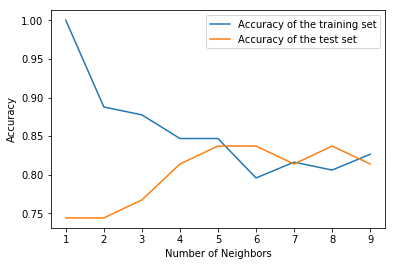

In [129]:
#KNN CLASSIFIER
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y,test_size=0.3, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_setting = range(1,10)         #taking 1-10 neighbours for best output

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

#graph between accuracy and Number of neighbours
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

Best Result when neighbours=6.

In [130]:
print('Accuracy on the testing set: {:.3f}'.format(test_accuracy[5]))

Accuracy on the testing set: 0.837


# Decision Tree Classifier

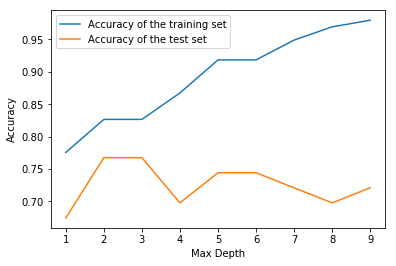

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,10)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()


In [132]:
print('Accuracy on the testing set: {:.3f}'.format(test_accuracy[2]))

Accuracy on the testing set: 0.767


Feature Importances

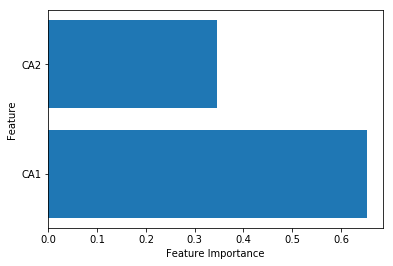

In [133]:
n_feature = X.shape[1]
plt.barh(range(n_feature), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), X)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# Random Forest Classifier

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)
pred9=forest.predict(X_test)

print('acc for test data: {:.3f}'.format(accuracy_score(pred9,y_test)))

acc for test data: 0.698


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Feature Importance

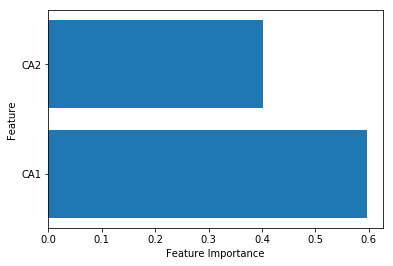

In [135]:
#Feature Importance
n_feature = X.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), X)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()